<img src="http://universidadcucii.mx/img/demos/law-firm/logo.png" width="150">

# Universidad CUCII 
## Estadística para la Educación

### Sesión 04/05 (Sábado 2018-06-23)

#### 0. Solución de la tarea 01 por equipos (Reto ENARM 2017)
Una vez teniendo el archivo *E41_enarm_ra_2017.docx* en la dirección dada por la orden:

In [1]:
getwd()

[1] "/home/ani/Dropbox/sonora/CUCII-StatsEdu"

procedemos a su lectura, invocando el paquete *docxtractr* previamente instalado

In [2]:
## ya instalamos con: install.packages("docxtractr")
library(docxtractr)

In [4]:
archivo <- read_docx(path = "E41_enarm_ra_2017.docx")
archivo

No comments in document


Word document [E41_enarm_ra_2017.docx]

Table 1
  total cells: 570
  row count  : 114
  uniform    : likely!
  has header : unlikely

Table 2
  total cells: 14
  row count  : 4
  uniform    : unlikely => found differing cell counts (1, 5, 4) across some rows
  has header : unlikely


In [5]:
tabla <- docx_extract_tbl(docx = archivo)
head(tabla)

Entidad Federativa,Facultad o Escuela de Medicina,Sustentantes,Seleccionados,Promedio generalconocimientos médicos
AGUASCALIENTES,UNIV. AUT. DE AGUASCALIENTES,239,84,67.52
AGUASCALIENTES,UNIV. CUAUHTEMOC - PLANTEL AGUASCALIENTES,72,9,63.81
BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",247,48,61.16
BAJA CALIFORNIA,"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",152,30,62.48
BAJA CALIFORNIA,UNIV. AUT. DE B.C. - CAMPUS VALLE DE LAS PALMAS,135,16,62.70
BAJA CALIFORNIA,"UNIV. AUT. DE B.C., U. ENSENADA",188,55,64.88


In [6]:
str(tabla)

'data.frame':	113 obs. of  5 variables:
 $ Entidad Federativa                   : chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Facultad o Escuela de Medicina       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - PLANTEL AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes                         : chr  "239" "72" "247" "152" ...
 $ Seleccionados                        : chr  "84" "9" "48" "30" ...
 $ Promedio generalconocimientos médicos: chr  "67.52" "63.81" "61.16" "62.48" ...


Cambiemos a numérico el tipo de datos de las 3 últimas columnas

In [7]:
tabla$Sustentantes <- as.numeric(tabla$Sustentantes)
tabla$Seleccionados <- as.numeric(tabla$Seleccionados)
tabla$`Promedio generalconocimientos médicos` <- as.numeric(tabla$`Promedio generalconocimientos médicos`)
str(tabla)

'data.frame':	113 obs. of  5 variables:
 $ Entidad Federativa                   : chr  "AGUASCALIENTES" "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA" ...
 $ Facultad o Escuela de Medicina       : chr  "UNIV. AUT. DE AGUASCALIENTES" "UNIV. CUAUHTEMOC - PLANTEL AGUASCALIENTES" "CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA" "CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA" ...
 $ Sustentantes                         : num  239 72 247 152 135 188 253 227 36 224 ...
 $ Seleccionados                        : num  84 9 48 30 16 55 103 85 5 38 ...
 $ Promedio generalconocimientos médicos: num  67.5 63.8 61.2 62.5 62.7 ...


Ahora podemos calcular la probabilidad (porcentual) de éxito, definida como:
$$probabilidad_{exito}=100 \times \dfrac{\sum Seleccionados}{\sum Sustentantes}$$

In [13]:
probExito <- 100 * sum(tabla$Seleccionados) / sum(tabla$Sustentantes)
probExito

[1] 22.24406

Es decir, que un médico general sólo tiene el $22.24\%$ de probabilidad de pasar el exámen. Es decir, que sólo $11$ de cada $50$ sustentantes aprobarán el ENARM. Procedamos a calcular la eficiencia:

In [15]:
eficiencia <- tabla$Seleccionados / tabla$Sustentantes
summary(eficiencia)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1250  0.1895  0.2072  0.2685  0.8571 

In [16]:
resultados <- data.frame(tabla$`Facultad o Escuela de Medicina`,eficiencia)
head(resultados)

tabla..Facultad.o.Escuela.de.Medicina.,eficiencia
UNIV. AUT. DE AGUASCALIENTES,0.3514644
UNIV. CUAUHTEMOC - PLANTEL AGUASCALIENTES,0.1250000
"CENTRO EST. UNIV. XOCHICALCO, U. ENSENADA",0.1943320
"CENTRO EST. UNIV. XOCHICALCO, U. TIJUANA",0.1973684
UNIV. AUT. DE B.C. - CAMPUS VALLE DE LAS PALMAS,0.1185185
"UNIV. AUT. DE B.C., U. ENSENADA",0.2925532


Por lo que la universidad con la más alta eficiencia es:

In [22]:
head(resultados[order(resultados$eficiencia,decreasing = TRUE),],1)

,tabla..Facultad.o.Escuela.de.Medicina.,eficiencia
28,UNIV. PANAMERICANA,0.8571429


la que peor eficiencia tuvo:

In [23]:
tail(resultados[order(resultados$eficiencia,decreasing = TRUE),],1)

,tabla..Facultad.o.Escuela.de.Medicina.,eficiencia
19,ESC. MÉDICO - MILITAR SEDENA,0


las universidades cuya eficiencia está en el 3er cuartil:

In [25]:
quantile(resultados$eficiencia)

0%       25%       50%       75%      100% 
0.0000000 0.1250000 0.1894587 0.2685185 0.8571429

In [30]:
quantile(resultados$eficiencia)[4]

75% 
0.2685185

In [32]:
super <- resultados[resultados$eficiencia >= quantile(resultados$eficiencia)[4], ]
super[order(super$eficiencia,decreasing = TRUE),]

,tabla..Facultad.o.Escuela.de.Medicina.,eficiencia
28,UNIV. PANAMERICANA,0.8571429
82,UNIV. AUT. DE SAN LUIS POTOSÍ,0.5200000
17,UNIV. AUT. DE CHIHUAHUA,0.4263959
7,"UNIV. AUT. DE B.C., U. MEXICALI",0.4071146
27,UNIV. LA SALLE,0.3904494
31,"UNIV. AUT. DE COAHUILA, U. TORREÓN",0.3879781
57,"UNIV. DE GUADALAJARA, U. LOS ALTOS",0.3796296
68,INST. TECNOLÓGICO EST. SUP. MONTERREY,0.3765690
8,"UNIV. AUT. DE B.C., U. TIJUANA",0.3744493
30,"UNIV. AUT. DE COAHUILA, U. SALTILLO",0.3644068


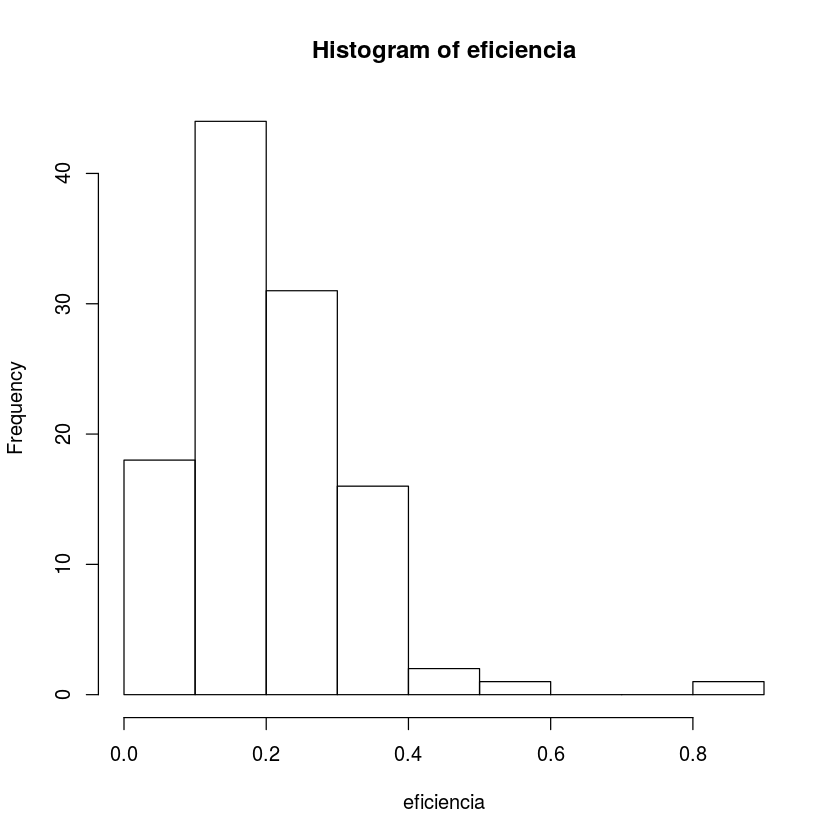

In [35]:
hist(eficiencia)

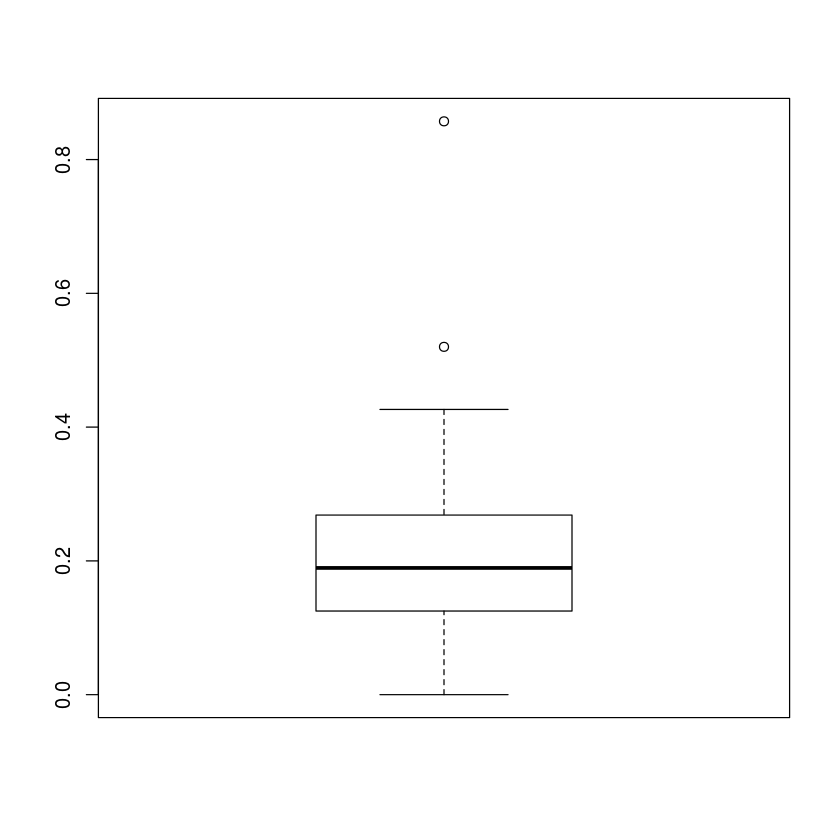

In [36]:
boxplot(eficiencia)

Hasta aquí la tarea/reto del ENARM 2017.

#### 1. Lectura de archivos MS Excel
Para esta parte usamos el archivo *pruebaExcelEnR.xlsx* contenido en la carpeta 99_Final de la colección de archivos para la sesión 03 de 05. Como siempre, para facilidad, lo colocamos en la ruta donde R lo lee directamente.

In [ ]:
#una única vez, hay que instalar el siguiente paquete
install.packages("readxl")

In [4]:
#cargamos la librería
library(readxl)

In [5]:
#leemos el archivo y exploramos la cabecita del mismo
archivo <- read_xlsx("pruebaExcelEnR.xlsx")
head(archivo)

mes,prom,bruto
Enero,1213,7.056947
Febrero,1921,12.459933
Marzo,5445,10.290030
Abril,4096,102.507354
Mayo,1524,21.755663
Junio,4312,87.815896


In [6]:
#vemos si las variables son leídas correctamente respecto de sus tipos
#en particular las dos últimas columnas son numéricas (como deben)
str(archivo)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	12 obs. of  3 variables:
 $ mes  : chr  "Enero" "Febrero" "Marzo" "Abril" ...
 $ prom : num  1213 1921 5445 4096 1524 ...
 $ bruto: num  7.06 12.46 10.29 102.51 21.76 ...


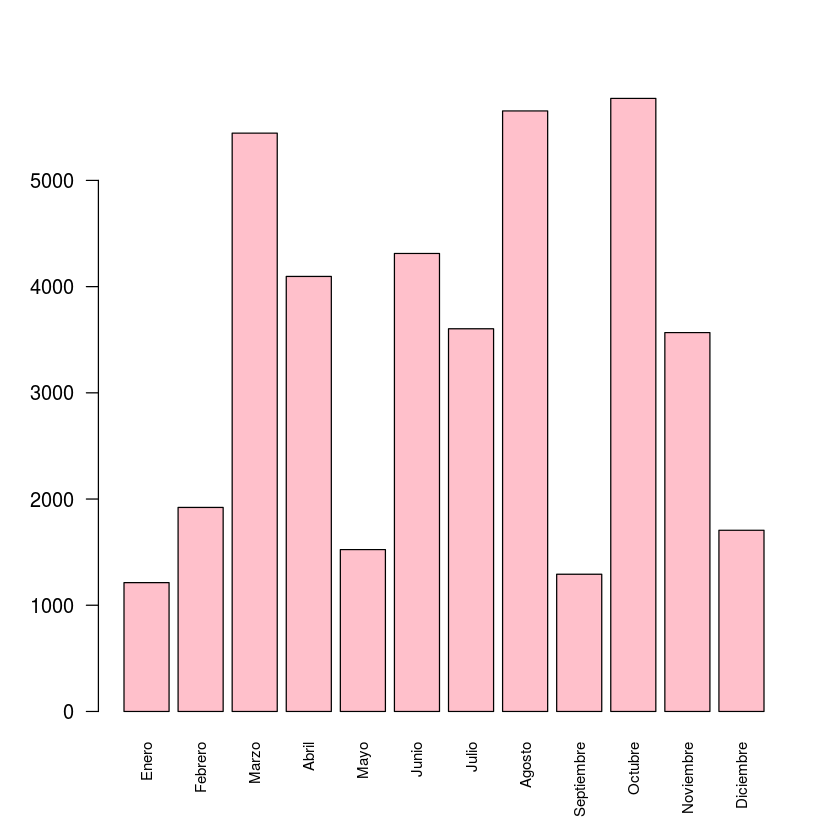

In [8]:
#grafiquemos algunas de ellas
barplot(archivo$prom,names.arg = archivo$mes,las=2,cex.names = 0.75,col="pink")

#### 2. Graficación múltiple

Si bien se pueden exportar las gráficas hechas en R mediante el botón Exportar>Imagen. Y posteriormente pegar cada uno de los archivos PNG en un archivo MS Word, por mencionar algún método manual. Hoy aprendimos a generar páneles de imágenes múltiples.

Comencemos por aprender a dividir el espacio de graficación de R en páneles múltiples mediante la orden *layout*, su notación es:

*layout(matrix(1:cuantaspartes, renglones, columnas))*

donde cuantaspartes es el número de partes en que se dividirá el panel; renglones y columnas deben coincidir en producto a cuantaspartes; veamos:

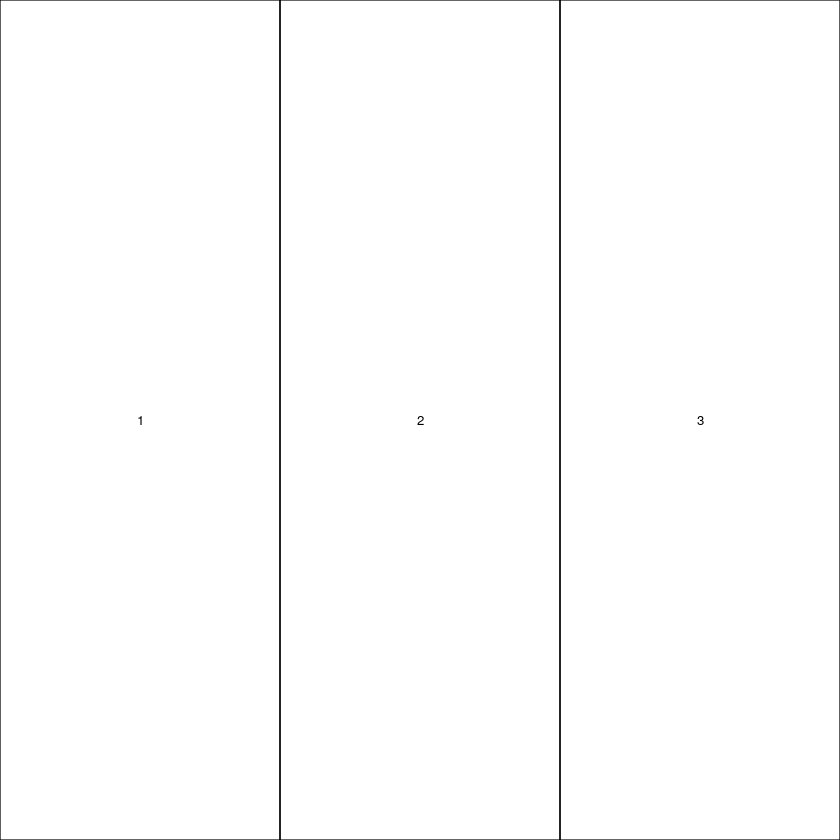

In [11]:
#dividir el panel en 3 gráficos, 1 renglón, 3 columnas
layout(matrix(1:3,1,3))
layout.show(3) #esta órden en sólo para mostrar cómo queda el panel

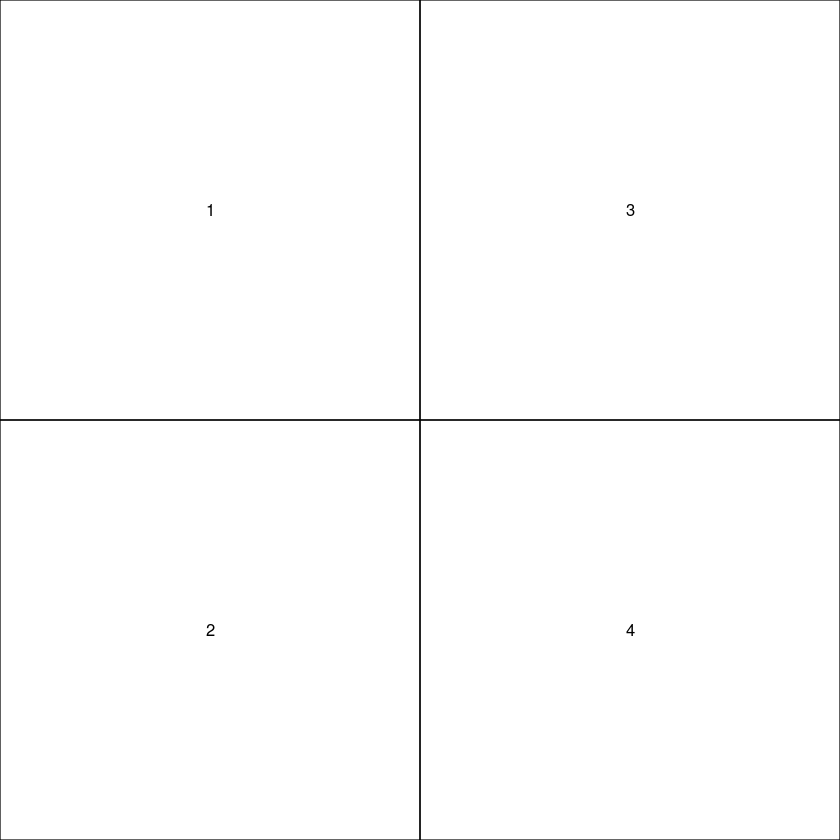

In [12]:
#otro ejemplo: en 4 partes, 2 renglones y 2 columnas
layout(matrix(1:4,2,2))
layout.show(4)

Basta de ejemplos, pongamos algunos gráficos del archivo MS Excel que importamos previamente:

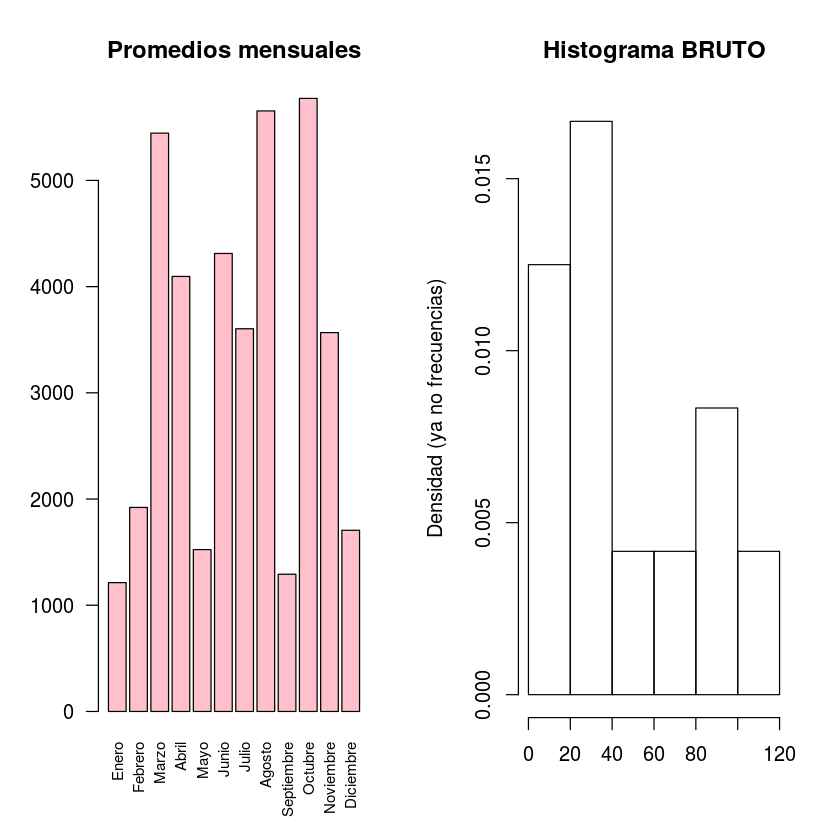

In [17]:
#panel divido en 2: 1 renglón y 2 columnas
layout(matrix(1:2,1,2))
#pongamos las gráficas, una tras otra:
barplot(archivo$prom,names.arg = archivo$mes,las=2,cex.names = 0.75,col="pink",main="Promedios mensuales")
hist(archivo$bruto,probability = TRUE,main="Histograma BRUTO",xlab = "",ylab="Densidad (ya no frecuencias)")

#### 3. La proporción aúrea

No me culpes. Es mi apetito por las esquisiteces matemáticas. Pero los diseñadores gráficos y los artistas clásicos la utilizan a cada rato y en cada trabajo. En la naturaleza está presente en muchos [aspectos geométricos](https://en.wikipedia.org/wiki/Golden_ratio).

Comunmente se denomina $\phi$ (se pronuncia *fi*, los gringos lo escriben *phi*) y está definida como:
$$\phi = \dfrac{1 + \sqrt{5}}{2} \approx 1.618$$

In [18]:
fi <- (1 + sqrt(5))/2
fi

[1] 1.618034

Tenme paciencia, lo vas a usar en la exportación de gráficos a continuación.

#### 4. Exportación a archivo gráfico externo

Digamos que queremos exportar el panel de 2 gráficas anterior, a un archivo de figura PNG, tnemos que decidir sus medidas (allí viene la aplicación de la proporción aúrea).
Si digamos, tiene 20 centímetros de ancho. El largo será de:

In [23]:
ancho <- 20
alto <- ancho / fi
alto

[1] 12.36068

Así tendremos un archivo de 20cm x 12.3607cm y eso la hará *geométricamente bella* (no me odies, sólo son matemáticas)

In [25]:
#generemos un PNG de nombre figuraPrueba.png de 20cm x 12.3607cm, con resolución de 600x600 dpi
png(filename = "figuraPrueba.png",width = ancho, height = alto, units = "cm",res = 600)

#añadimos la división del panel
#panel divido en 2: 1 renglón y 2 columnas
layout(matrix(1:2,1,2))
#pongamos las gráficas, una tras otra:
barplot(archivo$prom,names.arg = archivo$mes,las=2,cex.names = 0.75,col="pink",main="Promedios mensuales")
hist(archivo$bruto,probability = TRUE,main="Histograma BRUTO",xlab = "",ylab="Densidad (ya no frecuencias)")

#cerremos el device
dev.off()

png 
  2

Si has seguido las instrucciones, tendrás una bonita gráfica en la ruta defaul de R (*Documents* o *Mis Documentos* en caso de que uses windox):
<a href="http://i.imgur.com/z09FfM1.png">
  <img src="http://imgur.com/z09FfM1l.png" />
</a>